<a href="https://colab.research.google.com/github/ramonlsaraiva/concurrent_computing/blob/main/projeto_introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO 1** - Salários de Cientistas de Dados

In [499]:
import numpy
import pandas
from matplotlib import pyplot
from scipy import stats

## **1 - COLETA DE DADOS**

O dataset em questão foi obtido através do Kaggle e se trata de salários de cientistas de dados, contendo as seguintes colunas:

1.  **work_year**: ano em que o salário foi pago
2.  **experience_level**: nível de experiência (**EN**: Entry Level, **MI**: Mid Level, **SE**: Senior Level, **EX**: Executive Level)
3.  **employment_type**: o tipo de emprego para a função (**FT**: Full Time, **PT**: Partial Time, **CT**: Contractor, **FL**: Freelancer)
4.  **job_title**: função em que trabalhou durante o ano
5.  **salary**: valor bruto total do salário pago
6.  **salary_currency**: moeda do salário pago
7.  **salary_in_usd**: salário em dolar
8.  **employee_residence**: o país de residência principal do funcionário
9.  **remote_ratio**: quantidade total de trabalho feito remotamente
10. **company_location**: o país da sede da empresa
11. **company_size**: tamanho da empresa (**S**: Small, **M**: Medium, **L**: Large)

In [500]:
# importando o dataset para um objeto pandas.DataFrame
df = pandas.read_csv("https://raw.githubusercontent.com/ramonlsaraiva/dataset/main/ds_salaries.csv")

## **2 - PRÉ-PROCESSAMENTO DOS DADOS**

Neste tópico será abordado:
1. VERIFICAÇÃO DE DADOS AUSENTES
2. VERIFICAÇÃO DOS PAÍSES DE RESIDÊNCIA DAS EMPRESAS
3. DEFINIÇÃO DE TIPOS
4. LIMPEZA DE DADOS
5. NORMALIZAÇÃO DOS DADOS

### **2.1 - VERIFICAÇÃO DE DADOS AUSENTES**

Primeiramente, será verificado se existem dados ausentes no dataset.

In [501]:
# verificando os dados ausentes
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

A partir do código acima, é possível concluir que não há dados faltantes no conjunto de dados. Portanto, não será necessário utilizar nenhuma técnica para imputação de dados.

### **2.2 - VERIFICAÇÃO DOS PAÍSES DE RESIDÊNCIA DAS EMPRESAS**

Neste tópico será verificado os países de residência das empresas presentes no dataset.

In [502]:
# verificando a coluna company_location
df.value_counts('company_location')

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
EG       1
MT       1
MK       1
MD       1
VN       1
Length: 72, dtype: int64

Verificando a coluna *company_location*, é possível observar que, em vários países, existe apenas 1 amostra (ou pouquíssimas amostras). Dessa maneira, para realizar uma análise mais precisa, será mantido apenas os países que possuírem um número de amostras maior que a média do número de amostras.

In [503]:
# verificando a média de amostras entre os países
nAmostras = df.value_counts('company_location').values
mediaAmostrasPais = nAmostras.mean()
print("Média de amostras dos país:", mediaAmostrasPais)

Média de amostras dos país: 52.15277777777778


In [504]:
# selecionando países que serão mantidos do dataframe
paisesIdx = numpy.where(nAmostras > mediaAmostrasPais)
paisesSelec = df.value_counts('company_location').keys()[paisesIdx]
print("Países selecionados:", tuple(paisesSelec))

Países selecionados: ('US', 'GB', 'CA', 'ES', 'IN', 'DE')


In [505]:
# modificando o dataframe (mantendo apenas os países selecionados)
df = df[df['company_location'].isin(paisesSelec)]
df.value_counts('company_location').head(7)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
dtype: int64

Acima é possível visualizar que, apenas os seguintes países, permaneceram no dataframe:
1. **US**: Estados Unidos
2. **GB**: Reino Unido
3. **CA**: Canadá
4. **ES**: Espanha
5. **IN**: Índia
6. **DE**: Alemanha



### **2.3 - DEFINIÇÃO DE TIPOS**

Agora será realizado a definição de tipos, ou seja, dados do tipo *object* serão alterados para o tipo *category* no dataframe.

In [506]:
# verificando os tipos dos dados das colunas
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [507]:
# mudando do tipo object para category
for i in df.columns:
    if df[i].dtype==numpy.dtype('object'):
        df[i] = df[i].astype('category')

In [508]:
# verificando os tipos dos dados das colunas novamente
df.dtypes

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

### **2.4 - LIMPEZA DE DADOS**

Neste tópico, será analisada a distribuição dos dados, para verificar se existe algum dado incongruente no dataset. E isso será feito analisando os outliers de forma univariada e bivariada.

É importante ressaltar que, a análise multivariada, não faz muito sentido para esse conjunto de dados, pois, todas as variáveis relevantes para a variável *salary_in_usd*, são do tipo categórica. Sendo assim, a análise multivariada não será realizada.

##### **2.4.1 - DISTRIBUIÇÃO DOS SALÁRIOS (UNIVARIADO)**

<Axes: >

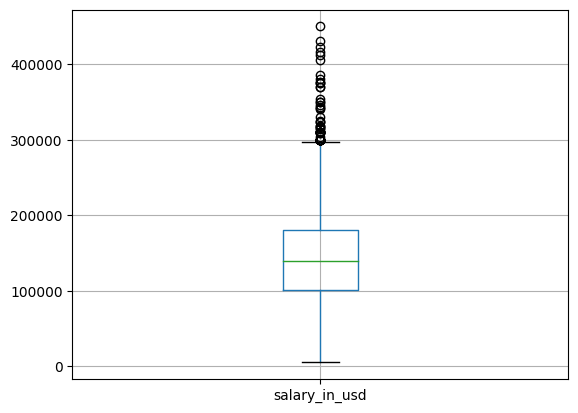

In [509]:
# verificando a distribuição dos salários em USD
df.boxplot(column='salary_in_usd')

A partir do gráfico acima é possível observar que não existe nenhum outlier inferior e existem vários outliers superiores. No entanto, não é possível tirar conclusões de que existem dados errados no conjunto de dados, pelo simples fato de haver outliers superiores. Além disso, não é algo incomum haver outliers em um conjunto de dados de salários, o qual possui salários para diferentes níveis de experiência, salários pagos por empresas de diferentes países e em diferentes moedas. Por conta disso, será realizada uma análize bivariada posteriormente, para melhores conclusões sobre os outliers.

##### **2.4.2 - SALÁRIO PARA DIFERENTES NÍVEIS DE EXPERIÊNCIA (BIVARIADO)**

Primeiramente, será verificado a distribuição dos salários (em dólar) para os diferentes níveis de experiência.

<Axes: title={'center': 'salary_in_usd'}, xlabel='experience_level'>

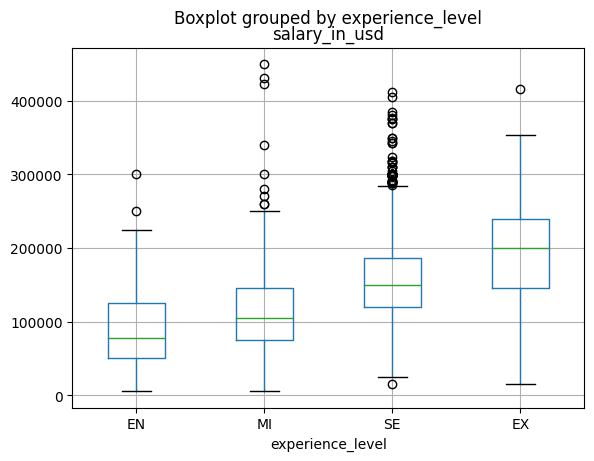

In [510]:
# reordenando as categorias para uma melhor visualização no boxplot
df['experience_level'] = df['experience_level'].cat.reorder_categories(['EN', 'MI', 'SE', 'EX'])

# verificando a distribuição dos salários para diferentes níveis de experiência
df.boxplot(column='salary_in_usd', by='experience_level')

Observando o gráfico, acima, é possível observar que o nível Executivo (EX), é o nível que possui menos outliers, em seguida vem os níveis Júnior (EN), Pleno (MI) e Sênior (SE), respectivamente. Sendo que o nível Sênior possui uma quantidade de outliers absurdamente maior que os demais níveis de experiência.

Outliers superiores em salários é algo comum, no entanto, existem 3 outliers com valores muito discrepantes para o nível Pleno (MI), que possuem valores maiores que o maior outlier do nível Executivo (EX), nível que tende a ser o mais valorizado no mercado. Por conta disso, será feita uma análise mais detalhada em cima destes outliers.

Outro fator observado no gráfico acima, é a presença de um outlier inferior para os salários do nível Sênior, o que não é algo muito comum quando se trata de salários. Por isso, também será realizada uma análise aprofundada sobre este outlier.

Primeiramente, será verificado o outlier inferior presente no boxplot do nível Sênior (SE):

In [511]:
# verificando o outlier inferior para o nível Sênior
df[df['experience_level'] == "SE"].sort_values('salary_in_usd', ascending=True).head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
988,2023,SE,FT,Data Analyst,1300000,INR,15806,IN,100,IN,S


Após verificar esse outlier inferior no conjunto de dados, foi possível observar que o salário foi pago em INR (rupia indiana), o que pode ser um fator que explique o porquê do salário ser tão baixo. Sendo que a rupia indiana é a segunda moeda mais desvalorizada do dataset (1 rupia indiana equivale a apenas 0,012 dólares). No entanto, será analisado se outros salários pagos em IN para o nível Sênior também possuem um baixo valor.

In [512]:
# verificando se existem outros salários Sênior que também são pagos em INR
df[df['experience_level'] == 'SE'].value_counts('salary_currency')

salary_currency
USD    2327
EUR      62
GBP      28
CAD      10
INR      10
HUF       0
PLN       0
dtype: int64

Acima, é possível observar que, no conjunto de dados, também existem outras amostras de salários do nível Sênior pagos em INR.

In [606]:
# verificando os dados que possuem nível Sênior e com salário pago em INR
df[(df['experience_level']=="SE") & (df['salary_currency']=='INR')].sort_values('salary_in_usd', ascending=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
988,2023,SE,FT,Data Analyst,1300000,INR,15806,IN,100,IN,S
3650,2021,SE,FT,Machine Learning Engineer,1799997,INR,24342,IN,100,IN,L
2655,2022,SE,FT,Principal Data Architect,3000000,INR,38154,IN,100,IN,L
3489,2021,SE,FT,Lead Data Scientist,3000000,INR,40570,IN,50,IN,L
1738,2021,SE,FT,Data Scientist,4000000,INR,54094,IN,100,IN,L
3649,2021,SE,FT,Data Science Manager,4000000,INR,54094,IN,50,US,L
1868,2022,SE,FT,Lead Data Scientist,4460000,INR,56723,IN,0,IN,L
3639,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


Porém, no dataframe acima, é possível observar que o outlier inferior no nível Sênior, é o único salário pago em INR e pago por uma pequena empresa. Sendo que as outras 9 empresas que também pagam em INR para os níveis Sênior, são grandes empresas.

E como essa pequena empresa é residente na Índia, será analisado a distribuição de salários (pagos em INR) de empresas residentes na Índia, agrupados pelo tamanho da empresa e pelo nível de experiência, para verificar se empresas menores realmente tendem a pagar menos.

<Axes: title={'center': 'salary_in_usd'}, xlabel='[company_size, experience_level]'>

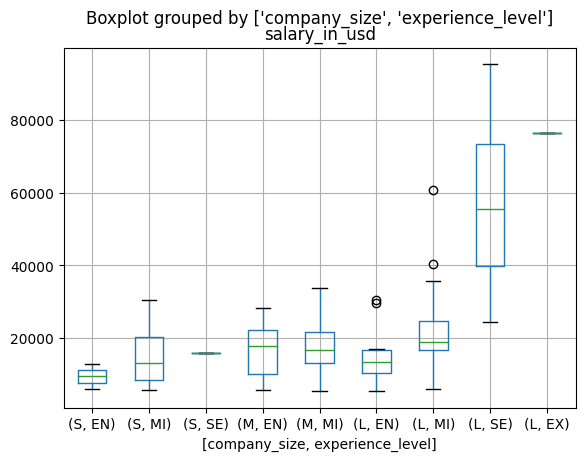

In [514]:
# reordenando as categorias para uma melhor visualização no boxplot
df['company_size'] = df['company_size'].cat.reorder_categories(['S', 'M', 'L'])

# verificando a distribuição dos salários na Índia (pagos em INR) para diferentes níveis de experiência e diferentes tamanhos de empresas
df[(df['company_location']=='IN') & (df['salary_currency']=='INR')].boxplot(by=['company_size','experience_level'], column='salary_in_usd')

A partir do gráfico acima, observa-se que empresas pequenas na Índia (que pagam em INR), tendem a pagar um salário menor.

Sendo assim, este outlier referente aos salários do nível Sênior, será mantido no dataset, uma vez que ele pode ser justificado pelo fato da empresa pagar em INR, além de ser uma pequena empresa residente na Índia.

O próximo passo, será verificar os 3 outliers (superiores) discrepantes no nível Pleno (MI):

In [515]:
# verificando os outliers superiores para o nível Pleno
df[df['experience_level'] == 'MI'].sort_values('salary_in_usd', ascending=False).head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L


Analisando os dados acima, é possível verificar que os salários dos 3 outliers foram pagos em GBP (que é a moeda mais valorizada do dataset) e em USD (a 3º moeda mais valorizada do dataset), o que pode ser um fator que explique o alto salário pago.

Além disso, também será investigado os salários para nível Pleno referentes aos cargos: Research Scientist, Data Analyst e Applied Machine Learning Scientist.

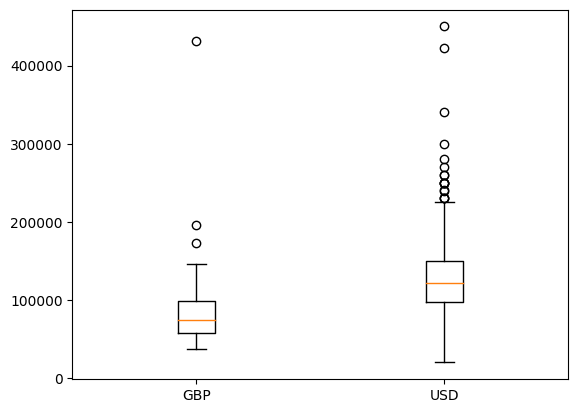

In [516]:
# separando apenas os salários pagos em GBP para o nível pleno
GBP = df[df['salary_currency'] == 'GBP']
GBP_MI = GBP[GBP['experience_level'] == 'MI']['salary_in_usd']

# separando apenas os salários pagos em USD para o nível pleno
USD = df[df['salary_currency'] == 'USD']
USD_MI = USD[USD['experience_level'] == 'MI']['salary_in_usd']

# verificando o boxplot para salários pagos em GBP e USD para o nível pleno
pyplot.boxplot([GBP_MI, USD_MI], labels=("GBP", "USD"))
pass

A partir do gráfico acima, é possível observar que, os demais salários pagos em GBP e USD para o nível Pleno, estão bem distantes destes 3 outliers. No entanto, ainda será verificado os cargos em questão.

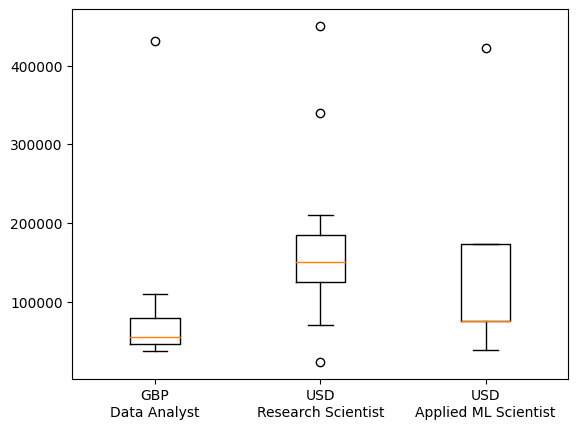

In [517]:
# separando apenas os salários pagos em GBP para o nível pleno
GBP = df[df['salary_currency'] == 'GBP']
GBP_MI = GBP[GBP['experience_level'] == 'MI']

# separando apenas os salários pagos em GBP para o cargo o Data Analyst no nível pleno
GBP_MI1 = GBP_MI[GBP_MI['job_title'] == 'Data Analyst']['salary_in_usd']

# separando apenas os salários pagos em USD para o nível pleno
USD = df[df['salary_currency'] == 'USD']
USD_MI = USD[USD['experience_level'] == 'MI']

# separando apenas os salários pagos em USD para o cargo o Research Scientist no nível pleno
USD_MI1 = USD_MI[USD_MI['job_title'] == 'Research Scientist']['salary_in_usd']

# separando apenas os salários pagos em USD para o cargo o Applied Machine Learning Scientist no nível pleno
USD_MI2 = USD_MI[USD_MI['job_title'] == 'Applied Machine Learning Scientist']['salary_in_usd']

# verificando o boxplot para salários pagos em GBP e USD para os cargos em questão no nível pleno
pyplot.boxplot([GBP_MI1, USD_MI1, USD_MI2], labels=("GBP\nData Analyst", "USD\nResearch Scientist", "USD\nApplied ML Scientist" ))
pass

Verificando o gráfico acima, é possível observar que mesmo analisando os salários em um contexto muito específico (filtrando por moeda e cargo), ainda assim, os dados permanecem muito distante dos demais.

Logo, não foi possível encontrar nenhum fator que explique o porquê de 3 salários do nível Pleno (MI) serem maiores que o maior outlier do nível Executivo (EX). Sendo assim, estes 3 outliers serão excluidos do dataset.

In [518]:
# excluindo as linhas do dataframe referentes aos 3 outliers
maxMI = df[df['experience_level'] == 'MI']['salary_in_usd'].sort_values(ascending=False).head(3).index
df = df.drop(maxMI)

# verificando o valor dos 3 maiores salários para o nível pleno
df[df['experience_level'] == 'MI']['salary_in_usd'].sort_values(ascending=False).head(3)

845    340000
190    300000
325    280700
Name: salary_in_usd, dtype: int64

##### **2.4.3 - SALÁRIO PARA EMPRESAS DE DIFERENTES PAÍSES (BIVARIADO)**

Agora, será verificado a distribuição dos salários (em dólar) para empresas de diferentes países.

<Axes: title={'center': 'salary_in_usd'}, xlabel='company_location'>

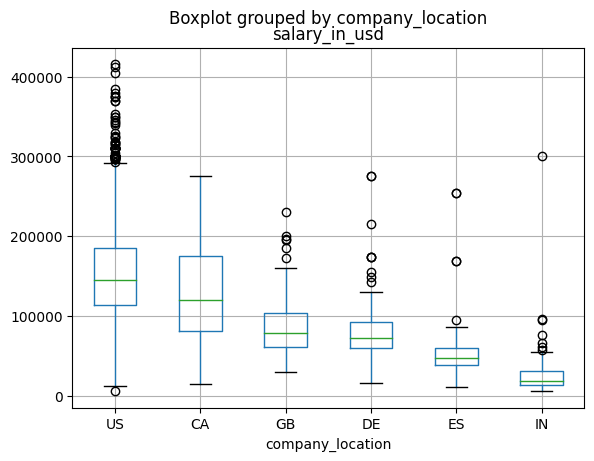

In [519]:
# reordenando as categorias para uma melhor visualização no boxplot
df['company_location'] = df['company_location'].cat.reorder_categories(["US", "CA", "GB", "DE", "ES", "IN"])

# verificando a distribuição dos salários para diferentes países
df.boxplot(column='salary_in_usd', by='company_location')

A partir do gráfico acima, é possível observar que os Estados Unidos (US) é o país com o maior número de outliers. No entanto, em seu boxplot, não há nenhum outlier superior que esteja muito distante dos demais. Porém, existe um outlier inferior, que será analisado mais a fundo, uma vez que outliers inferiores não é algo muito comum quando se trata de salários.

Já no boxplot referente a empresas da Índia (IN), existe um outlier superior muito discrepante dos demais. Além disso, o boxplot referente à Alemanha (DE) e o boxplot referente a Espanha (ES), também possuem um outlier que está um pouco distante dos demais.

Primeiramente, será verificado o outlier inferior referente ao boxplot dos Estados Unidos (US):

In [520]:
# verificando o outlier inferior para empresas dos EUA
df[df['company_location'] == "US"].sort_values('salary_in_usd', ascending=True).head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S


Após verificar esse outlier inferior no conjunto de dados, foi possível observar que o salário foi pago em INR (rupia indiana), o que pode ser explicado pelo fato do cientista de dados residir na Índia.

E, como dito anteriormente, essa é a segunda moeda mais desvalorizada no conjunto de dados (1 rupia indiana equivale a apenas 0,012 dólares), logo, esse pode ser um fator que justifique o outlier. Por conta disso, será verificado se outras empresas dos Estados Unidos que pagam em INR, também pagam um baixo valor.

In [521]:
# verificando se existem outras empresas nos Estados Unidos que também são pagam em INR
df[df['company_location'] == 'US'].value_counts('salary_currency')

salary_currency
USD    3030
EUR       4
INR       3
HUF       1
CAD       0
GBP       0
PLN       0
dtype: int64

Acima, é possível observar que, no conjunto de dados, também existem outras empresas dos Estados Unidos que também pagam em INR.

In [522]:
# verificando as demais empresas dos Estados Unidos que também pagam em INR
df[(df['company_location']=="US") & (df['salary_currency']=='INR')].sort_values('salary_in_usd', ascending=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
1918,2022,MI,FT,Data Scientist,2500000,INR,31795,IN,100,US,M
3649,2021,SE,FT,Data Science Manager,4000000,INR,54094,IN,50,US,L


A partir dos dados acima, observa-se que o valor é bem discrepante dos demais, mesmo se tratando de salários pagos em INR por empresas residentes nos Estados Unidos.

No entanto, pode ser que a empresa tenha optado por contratar cientistas de dados indianos e seguir uma média salarial parecida com as empresas que residem na Índia. Sendo assim, será verificado os demais salários pagos em INR presentes no dataset.

In [523]:
# verificando os demais salários pagos em INR
df[df['salary_currency']=='INR'].sort_values('salary_in_usd',ascending=True).head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
3023,2022,MI,FT,Data Analyst,450000,INR,5723,IN,100,IN,S
3689,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
3593,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
2872,2022,EN,FT,Data Analyst,500000,INR,6359,FR,100,IN,L
2800,2022,EN,FT,BI Data Analyst,633000,INR,8050,IN,100,IN,M
3494,2021,MI,FT,Data Scientist,700000,INR,9466,IN,0,IN,S


Acima, é possível observar que, vários outros salários pagos em INR, se aproximam desse valor. Sendo assim, apesar de ser um outlier inferior, acredita-se que este dado não estaja errado e ele será mantido no dataset.

O próximo passo, será verificar os outros 3 outliers superiores mencionados anteriormente: um referente a empresas da Índia, outro referente a empresas da Alemanha e, por fim, um referente a empresas da Espanha.

Primeiramente, será verificado o outlier referente às empresas da Índia (IN):

In [524]:
# verificando o outlier superior para empresas da Índia
df[df['company_location'] == "IN"].sort_values('salary_in_usd', ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
83,2022,EN,FT,AI Developer,300000,USD,300000,IN,50,IN,L
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
3639,2021,SE,FT,Machine Learning Engineer,4900000,INR,66265,IN,0,IN,L


Acima, é possível observar que o salário referente ao outlier foi pago em dólar, o que pode contribuir para o salário ser um pouco maior. No entanto, é algo muito incomum uma empresa residente na Índia (país que possui uma moeda relativamente desvalorizada), pagar o salário em dólar e ainda seguir a média salarial de empresas dos Estados Unidos (média salarial absurdamente maior do que a média salarial paga por empresas residentes na Índia). E como não foi encontrada nenhuma evidência que explique este fato, acredita-se que o dado esteja errado e ele será excluído do dataset.

In [525]:
# excluindo a linha do dataframe referentes ao outlier da Índia
maxIN = df[df['company_location'] == 'IN']['salary_in_usd'].sort_values(ascending=False).head(1).index
df = df.drop(maxIN)

# verificando o valor do maior salário em empresas da Índia
df[df['company_location'] == 'IN']['salary_in_usd'].sort_values(ascending=False).head(1)

2966    95386
Name: salary_in_usd, dtype: int64

O próximo passo será verificar o outlier referente às empresas da Alemanha (DE):

In [526]:
# verificando o outlier superior para empresas da Alemanha
df[df['company_location'] == "DE"].sort_values('salary_in_usd', ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
21,2023,SE,FT,Research Engineer,275000,USD,275000,DE,0,DE,M
1024,2023,SE,FT,Machine Learning Engineer,275000,USD,275000,DE,0,DE,M
836,2023,EN,FT,AI Developer,200000,EUR,214618,DE,100,DE,L
22,2023,SE,FT,Research Engineer,174000,USD,174000,DE,0,DE,M
1025,2023,SE,FT,Machine Learning Engineer,174000,USD,174000,DE,0,DE,M


A partir dos dados acima, é possível observar que, na verdade, não era apenas um outlier discrepante, e sim 2 outliers sobrepostos para empresas da Alemanha (DE).

Além disso, os salários foram pagos em USD, o que pode ser um fator que explique o porquê dos salários serem tão altos. E como a Alemanha é um país que possui uma moeda forte (o euro), é provavél que as empresas consigam pagar próximo ao que as empresas dos Estados Unidos pagam, principalmente quando se trata de um nível Sênior.

Logo, por conta desse conjunto de fatores (existir mais de um salário igual a 275 mil, além dos salários serem pagos em USD), acredita-se que estes dados não estajam errados e eles serão mantidos no dataset.

O próximo passo será verificar o outlier referente ao boxplot da Espanha (ES):

In [527]:
# verificando o outlier superior para empresas da Espanha
df[df['company_location'] == "ES"].sort_values('salary_in_usd', ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1249,2023,SE,FT,Research Scientist,253750,USD,253750,ES,0,ES,M
1247,2023,SE,FT,Research Scientist,253750,USD,253750,ES,0,ES,M
1250,2023,SE,FT,Research Scientist,169200,USD,169200,ES,0,ES,M
1248,2023,SE,FT,Research Scientist,169200,USD,169200,ES,0,ES,M
1653,2023,MI,FT,Data Engineer,95000,USD,95000,ES,100,ES,M


Analisando os dados acima, é possível observar que o outlier em questão, na verdade, eram 2 outliers sobrepostos. Mas, diferentemente dos outliers sobrepostos no boxplot da Alemanha (DE), aqui os outliers possuem valores idênticos em todas as colunas.

É possível haver dados com todas as colunas idênticas, no entanto, como se trata de um outlier, é algo muito pouco provável. Somando ao fato deste outlier possuir um valor muito discrepante dos demais, deduz-se que este dado esteja errado e ele será excluído do dataset.

Além disso, também foi possível observar mais 2 outliers sobrepostos com o valor de 169,2 mil, que também possuem todas as colunas idênticas. No entanto, como o valor desse outlier não é tão discrepante quanto o outlier anterior, será excluído apenas uma das linhas por acreditar-se que o dado foi apenas duplicado.

In [528]:
# excluindo as 3 linhas do dataframe referentes aos dados da Espanha
maxES = df[df['company_location'] == 'ES']['salary_in_usd'].sort_values(ascending=False).head(3).index
df = df.drop(maxES)

# verificando os maiores valores da Espanha novamente
df[df['company_location'] == "ES"].sort_values('salary_in_usd', ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1248,2023,SE,FT,Research Scientist,169200,USD,169200,ES,0,ES,M
1653,2023,MI,FT,Data Engineer,95000,USD,95000,ES,100,ES,M
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3200,2022,MI,FT,Data Engineer,80000,EUR,84053,ES,100,ES,M
2892,2022,MI,FT,Data Engineer,80000,EUR,84053,ES,100,ES,M


##### **2.4.4 - SALÁRIO PAGO EM DIFERENTES MOEDAS (BIVARIADO)**

Neste subtópico, será verificado a distribuição dos salários (em dólar) pagos em diferentes moedas.

<Axes: title={'center': 'salary_in_usd'}, xlabel='salary_currency'>

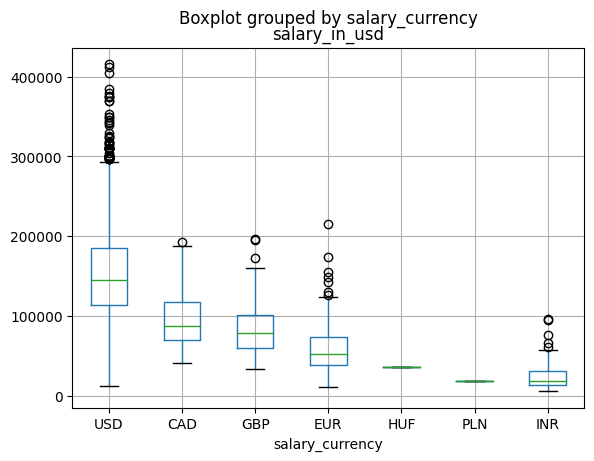

In [529]:
# reordenando as categorias para uma melhor visualização no boxplot
df['salary_currency'] = df['salary_currency'].cat.reorder_categories(["USD", "CAD", "GBP", "EUR", "HUF", "PLN", "INR"])

# verificando a distribuição dos salários de nível Sênior pago em diferentes moedas
df.boxplot(column='salary_in_usd', by='salary_currency')

No gráfico acima, é possível observar que não existem outliers inferiores, e há apenas um outlier superior distante dos demais (no boxplot do EUR). Por conta disso, esse outlier será analisado de forma mais detalhada.

In [530]:
# verificando o outlier referente aos salários pagos em EUR
df[df['salary_currency'] == 'EUR'].sort_values('salary_in_usd', ascending=False).head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
836,2023,EN,FT,AI Developer,200000,EUR,214618,DE,100,DE,L
3725,2021,SE,FT,Principal Data Scientist,147000,EUR,173762,DE,100,DE,M
3483,2022,SE,FT,Principal Data Scientist,148000,EUR,155499,DE,100,DE,M
3726,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,100,DE,M
3643,2021,EX,FT,Director of Data Science,120000,EUR,141846,DE,0,DE,L
3515,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M
2686,2022,MI,FT,Research Scientist,120000,EUR,126080,DE,0,DE,S
805,2023,SE,FT,Deep Learning Researcher,115000,EUR,123405,DE,0,DE,L
3683,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
1022,2023,SE,FT,Research Engineer,100000,EUR,107309,DE,100,DE,S


Visualizando o outlier do boxplot referente ao euro (EUR), é possível observar que o nível do cientista de dados é Júnior (EN). O que é muito estranho: um nível Júnior ganhar um salário muito maior que vários níveis Sênior (SE) e Executivo (EX). E, além de um nível Júnior ser o maior dos outliers, só há este nível Júnior entre os outliers.

Outro fator importante é que, tanto este outlier quanto os demais, são de empresas residentes na Alemanha (DE) e os cientistas de dados também residem na Alemanha. Portanto, não há diferença de país entre os outliers para que seja possível justificar a discrepância entre os valores.

Portanto, acredita-se que este dado esteja errado e ele será removido do dataset.

In [531]:
# excluindo as 3 linhas do dataframe referentes aos dados da Espanha
maxEUR = df[df['salary_currency'] == 'EUR']['salary_in_usd'].sort_values(ascending=False).head(1).index
df = df.drop(maxEUR)

# verificando os maiores valores da Espanha novamente
df[df['salary_currency'] == "EUR"].sort_values('salary_in_usd', ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3725,2021,SE,FT,Principal Data Scientist,147000,EUR,173762,DE,100,DE,M
3483,2022,SE,FT,Principal Data Scientist,148000,EUR,155499,DE,100,DE,M
3726,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,100,DE,M
3643,2021,EX,FT,Director of Data Science,120000,EUR,141846,DE,0,DE,L
3515,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M


### **2.5 - NORMALIZAÇÃO E DISCRETIZAÇÃO DOS DADOS**

Agora, será criado um dataframe contendo os dados normalizados, para auxiliar nas análises que serão realizadas posteriormente.

Para a normalização, será utilizada a técnica do mínimo e máximo.

In [532]:
# copiando o dataframe para a variável dfNorm
dfNorm = df.copy()

# modificando cada categoria no dataframe para o seu respectivo código
dfNorm['experience_level'] = dfNorm['experience_level'].cat.codes
dfNorm['employment_type'] = dfNorm['employment_type'].cat.codes
dfNorm['job_title'] = dfNorm['job_title'].cat.codes
dfNorm['salary_currency'] = dfNorm['salary_currency'].cat.codes
dfNorm['employee_residence'] = dfNorm['employee_residence'].cat.codes
dfNorm['company_location'] = dfNorm['company_location'].cat.codes
dfNorm['company_size'] = dfNorm['company_size'].cat.codes

# normalizando min-max
dfNorm = (dfNorm-dfNorm.min())/(dfNorm.max()-dfNorm.min())

Abaixo, será feita uma discretização do salário com 10 bins com um mesmo intervalo.

In [604]:
pandas.cut(df['salary_in_usd'],10).value_counts()

(128586.3, 169645.4]    1006
(87527.2, 128586.3]      813
(169645.4, 210704.5]     649
(46468.1, 87527.2]       482
(210704.5, 251763.6]     260
(4998.409, 46468.1]      130
(251763.6, 292822.7]      83
(292822.7, 333881.8]      42
(333881.8, 374940.9]       9
(374940.9, 416000.0]       8
Name: salary_in_usd, dtype: int64

Acima, é possível observar que os salários que possuem maior frequência, está no intervalo entre 128,5 mil e 169,6 mil.

Por fim, será feita uma discretização dos salários com 10 bins, mas com uma quantidade de frequência próxima entre os intervalos.

In [603]:
pandas.qcut(df['salary_in_usd'],10).value_counts()

(126032.0, 140000.0]    410
(150000.0, 170000.0]    375
(93918.2, 110000.0]     368
(5408.999, 67750.7]     349
(67750.7, 93918.2]      348
(220000.0, 416000.0]    344
(190000.0, 220000.0]    334
(110000.0, 126032.0]    328
(170000.0, 190000.0]    328
(140000.0, 150000.0]    298
Name: salary_in_usd, dtype: int64

## **3 - ESTATÍSTICAS DESCRITIVAS DOS DADOS**

Primeiramente, os dados serão analisados de um modo mais geral.

count      3482.000000
mean     142619.830844
std       59957.702194
min        5409.000000
25%      100907.000000
50%      140000.000000
75%      180000.000000
max      416000.000000
Name: salary_in_usd, dtype: float64

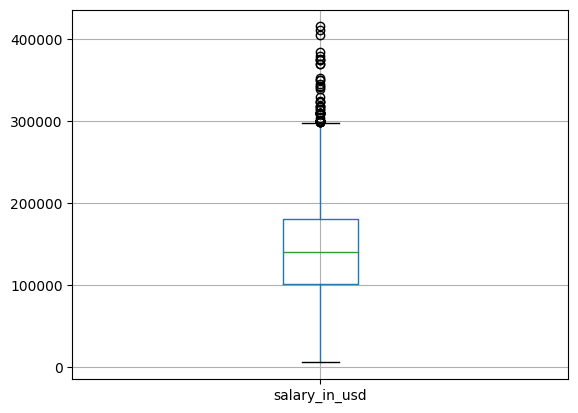

In [533]:
# verificando a distribuição dos salários através de um boxplot
df.boxplot(column='salary_in_usd')

# medidas descritivas do salário
df['salary_in_usd'].describe()

Através do boxplot e das medidas descritivas geradas acima, é possível observar que a mediana dos salários é igual a 140 mil dólares, enquanto a média é igual a 142,6 mil dólares. E como é possível observar vários outliers presentes no boxplot, a mediana irá descrever melhor os dados, uma vez que ela é mais robusta a outliers do que a média. Além disso, também é possível observar que a distribuição possui um alto desvio padrão, igual a 59,9 mil dólares.

A seguir será analisado a distribuição dos salários por meio de um histograma.

Assimetria: 0.514272549101603
Curtose: 0.6918079267485635


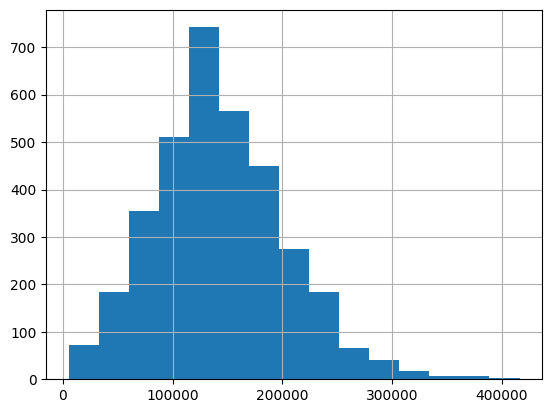

In [534]:
# verificando a distribuição do salário através de um histograma
df['salary_in_usd'].hist(bins=15)

# verificando a assimetria e a curtose
print("Assimetria:", df['salary_in_usd'].skew())
print("Curtose:", df['salary_in_usd'].kurtosis())

Através do histograma e dos valores de curtose e assimetria gerados acima, é possível observar que a distribuição dos salários tem uma forte assimetria à direita (assimetria > 0). Além disso, a distribuição é mais alta e afunilada que a distribuição normal (curtose > 0).

O próximo passo será analisar os salários separados por nível de experiência.

Mediana
 experience_level
EN     76833.0
MI    105000.0
SE    148900.0
EX    200000.0
Name: salary_in_usd, dtype: float64

Média
 experience_level
EN     86506.522088
MI    110661.797101
SE    154947.444947
EX    197829.412844
Name: salary_in_usd, dtype: float64

Desvio Padrão
 experience_level
MI    49657.583560
EN    50172.985150
SE    55416.419929
EX    69926.252194
Name: salary_in_usd, dtype: float64


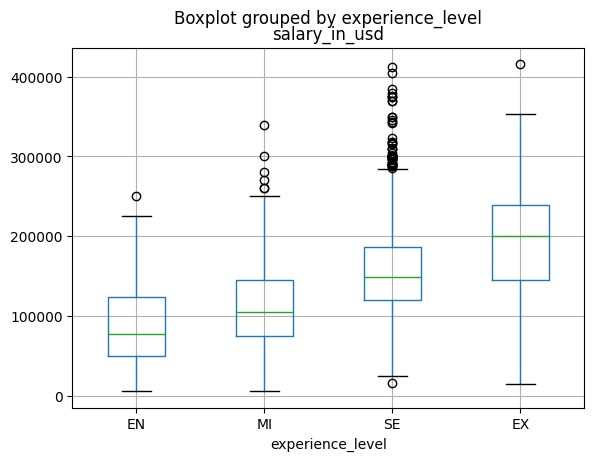

In [535]:
# verificando a distribuição dos salários para diferentes níveis de experiência
df.boxplot(column='salary_in_usd', by='experience_level')

# verificando a mediana para cada nível de experiência
print("Mediana\n", df.groupby('experience_level')['salary_in_usd'].median().sort_values(ascending=True))

# verificando a média para cada nível de experiência
print("\nMédia\n", df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True))

# verificando o desvio padrão para cada nível de experiência
print("\nDesvio Padrão\n", df.groupby('experience_level')['salary_in_usd'].std().sort_values(ascending=True))

Observando o gráfico e as medidas descritivas geradas acima, é possível observar que a mediana dos salários do nível Júnior (EN) é aquela que possui o menor valor, 76,8 mil dólares, em seguida, vem a mediana do nível Pleno (MI), 105 mil dólares. Posteriormente, vem a mediana do nível Sênior (SE), 148,9 mil dólares, e por fim, a mediana do nível Executivo (EX), 200 mil dólares, possuindo o maior valor. Esses valores das medianas estão dentro da lógica, já que o nível Júnior é o nível de menor experiência e, a medida que o nível de experiência vai aumentando, espera-se que o salário também aumente.

Além disso, também é possível observar que o nível de experiência Executivo é aquele que possui uma maior variabilidade de salário, com desvio padrão igual a 69,9 mil dólares. Enquanto isso, o nível Pleno é o nível com o menor desvio padrão, igual a 49,6 mil dólares.

A seguir, será analisado os salários separados pelo país onde residem as empresas.

Mediana
 company_location
US    145000.0
CA    120000.0
GB     78990.0
DE     71897.0
ES     47280.0
IN     18238.0
Name: salary_in_usd, dtype: float64

Média
 company_location
US    151634.598091
CA    131917.689655
DE     85991.909091
GB     84877.906433
ES     50869.689189
IN     25464.368421
Name: salary_in_usd, dtype: float64

Desvio Padrão
 company_location
CA    61182.471960
US    55557.345478
DE    52704.719640
GB    34563.390684
ES    21173.592450
IN    20483.240345
Name: salary_in_usd, dtype: float64


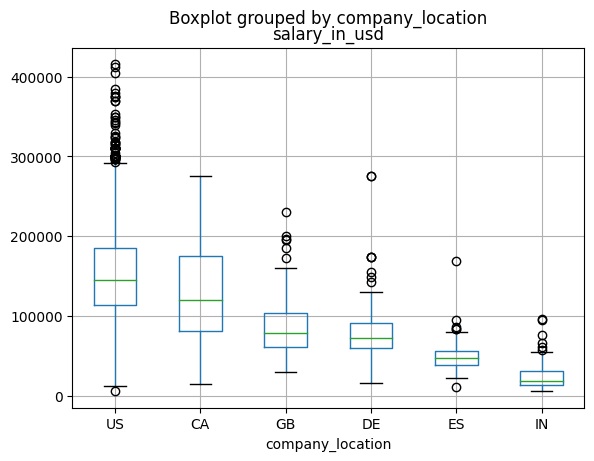

In [536]:
# verificando a distribuição dos salários para diferentes países (de residência da empresa)
df.boxplot(column='salary_in_usd', by='company_location')

# verificando a mediana para cada país (de residência da empresa)
print("Mediana\n", df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False))

# verificando a média para cada país (de residência da empresa)
print("\nMédia\n", df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False))

# verificando o desvio padrão para cada país (de residência da empresa)
print("\nDesvio Padrão\n", df.groupby('company_location')['salary_in_usd'].std().sort_values(ascending=False))

Observando o gráfico e as medidas descritivas geradas acima, é possível observar que a mediana dos salários de empresas dos Estados Unidos (US) é aquela que possui o maior valor, 145 mil dólares, em seguida, vem a mediana de empresas do Canadá (CA), 120 mil dólares. Posteriormente, vem as medianas de empresas do Reino Unido (GB), Alemanha (DE) e Espanha (ES), com valores iguais a 78,9 mil, 71,8 mil e 47,2 mil dólares, respectivamente.

Por último, vem a mediana dos salários de empresas residentes na Índia (IN), com valor igual a 25,4 mil dólares. E isto pode ser explicado pelo fato de a Índia possuir a moeda mais fraca dentre os demais países.

Além disso, também foi possível observar que o Canáda é o país que possui maior variabilidade entre os salários, com o desvio padrão igual a 61,1 mil dólares. Em seguida, vem os Estados Unidos e a Alemanha, com os desvios padrão iguais a 55,5 mil e 52,7 mil dólares, respectivamente. O país com a menor variabilidade entre os salários é a Índia, com o desvio padrão igual a 20,4 mil dólares.

Agora, será analisado os salários agrupados pela moeda em que o salário é pago.

Mediana
 salary_currency
USD    145000.0
CAD     87738.0
GBP     77974.0
EUR     51508.0
HUF     36259.0
INR     18021.5
PLN     17779.0
Name: salary_in_usd, dtype: float64

Média
 salary_currency
USD    151551.616496
CAD     96707.400000
GBP     81983.442308
EUR     60267.842520
HUF     36259.000000
INR     25933.178571
PLN     17779.000000
Name: salary_in_usd, dtype: float64

Desvio Padrão
 salary_currency
USD    55748.525078
CAD    40418.226399
GBP    30357.952867
EUR    28259.632002
INR    21156.925341
HUF             NaN
PLN             NaN
Name: salary_in_usd, dtype: float64


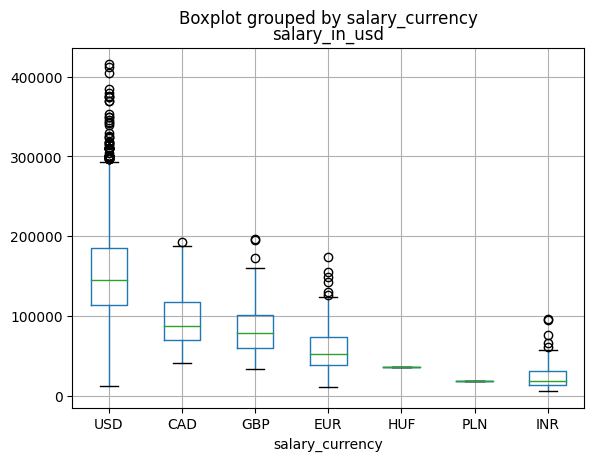

In [537]:
# verificando a distribuição dos salários para diferentes moedas
df.boxplot(column='salary_in_usd', by='salary_currency')

# verificando a mediana para cada moeda em que o salário é pago
print("Mediana\n", df.groupby('salary_currency')['salary_in_usd'].median().sort_values(ascending=False))

# verificando a média para cada moeda em que o salário é pago
print("\nMédia\n", df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False))

# verificando a desvio padrão para cada moeda em que o salário é pago
print("\nDesvio Padrão\n", df.groupby('salary_currency')['salary_in_usd'].std().sort_values(ascending=False))

Observando o gráfico e as medidas descritivas geradas acima, é possível observar que a mediana dos salários pagos em USD é aquela que possui o maior valor, em seguida, vem a mediana de salário pagos em CAD e, posteriormente, em GBP. Seguindo a mesma sequência do gráfico analisado anteriormente, o que pode ser justificado pelo fato de empresas dos Estados Unidos pagar a maioria dos salários em USD, empresas do Canadá pagar em CAD, empresas do Reino Unido pagar em GBP, etc.

O desvio padrão também segue esta mesma lógica, o maior desvio padrão é de salários pagos em USD, enquanto o menor desvio padrão é de salários pagos em INR. Também é importante observar que o desvio padrão das moedas HUF e PLN estão com valores NaN pelo fato de existir apenas uma amostra dessas moedas no dataset.

O próximo passo, será analisar os salários separados pelo estilo de trabalho: remoto, híbrido ou presencial.

Mediana
 remote_ratio
0      140000.0
100    140000.0
50      79833.0
Name: salary_in_usd, dtype: float64

Média
 remote_ratio
0      146249.952047
100    141921.763660
50      89562.439252
Name: salary_in_usd, dtype: float64

Desvio Padrão
 remote_ratio
100    61261.656756
50     61085.911827
0      57320.904153
Name: salary_in_usd, dtype: float64


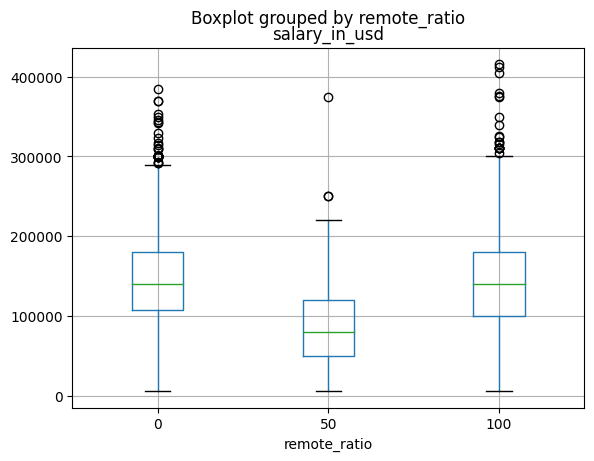

In [538]:
# verificando a distribuição dos salários para diferentes estilos de trabalho
df.boxplot(column='salary_in_usd', by='remote_ratio')

# verificando a mediana para cada estilo de trabalho
print("Mediana\n", df.groupby('remote_ratio')['salary_in_usd'].median().sort_values(ascending=False))

# verificando a média para cada estilo de trabalho
print("\nMédia\n", df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False))

# verificando a desvio padrão para cada estilo de trabalho
print("\nDesvio Padrão\n", df.groupby('remote_ratio')['salary_in_usd'].std().sort_values(ascending=False))

Observando o gráfico e os valores gerados acima, é possível concluir que não há diferenças significativas entre salários para empregos remotos (100) e presenciais (0), sendo que a mediana de ambos são idênticas, com valor igual a 140 mil.

Além disso, é possível observar que a mediana dos empregos híbridos (50) é igual à 79,8 mil (metade da mediana de empregos remotos e presenciais). No entanto, não faz muito sentido concluir que empregos híbridos pagam menos que remotos e presenciais, uma vez que um emprego híbrido é uma mescla destas duas modalidades de trabalho. Portanto, podemos concluir que isso foi apenas uma coincidência no dataset. Por conta disso, será verificado abaixo se todas as 3 categorias possuem amostras significativas.

In [539]:
# verificando a quantidade de amostras para cada categoria
df.value_counts('remote_ratio')

remote_ratio
0      1856
100    1519
50      107
dtype: int64

Acima, é possível verificar que o dataset possui poucas amostras para trabalhos híbridos (50), o que pode justificar esta discrepância (sem sentido) entre as modalidades de trabalho. Além disso, também será verificado abaixo, o número de amostras de cada nível de experiência, para as diferentes modalidades de trabalho.

In [540]:
# verificando a quantidade de amostras de cada nível de experiência para as diferentes modalidades de trabalho
df.groupby(['remote_ratio','experience_level']).count()['salary_in_usd']

remote_ratio  experience_level
0             EN                   100
              MI                   370
              SE                  1333
              EX                    53
50            EN                    39
              MI                    38
              SE                    25
              EX                     5
100           EN                   110
              MI                   282
              SE                  1076
              EX                    51
Name: salary_in_usd, dtype: int64

Acima, é possível observar que a modalidade híbrida, possui o maior número das amostras referentes aos níveis Júnior e Pleno. Em contrapartida, as modalidades presencial e remota, apresentam uma quantidade de amostras absurdamente maior referente ao nível Sênior. O que explica o porquê da modalidade híbrida possuir uma mediana absurdamente menor. Por conta disso, as modalidades de trabalho serão analisadas novamente, mas, agora, agrupando também por nível de experiência.

<ipython-input-541-70c2efce1234>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['remote_ratio','experience_level']).median()['salary_in_usd']


remote_ratio  experience_level
0             EN                  120000.0
              MI                  111887.5
              SE                  146000.0
              EX                  182160.0
50            EN                   50000.0
              MI                   76124.0
              SE                  117104.0
              EX                  125976.0
100           EN                   64600.0
              MI                  100000.0
              SE                  150000.0
              EX                  210914.0
Name: salary_in_usd, dtype: float64

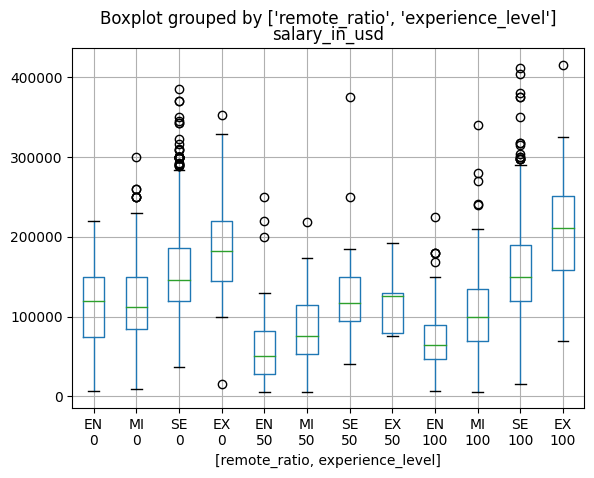

In [541]:
# criando os labels
modalidade = ['0', '50', '100']
exp = ['EN', 'MI', 'SE', 'EX']
labels=[]
for i in modalidade:
  for j in exp:
    labels.append(j+'\n'+i)

# verificando a distribuição dos salários de cada nível de experiência para as diferentes modalidades de trabalho
df.boxplot(column='salary_in_usd', by=['remote_ratio', 'experience_level']).set_xticklabels(labels)

# calculando a mediana dos salários de cada nível de experiência para as diferentes modalidades de trabalho
df.groupby(['remote_ratio','experience_level']).median()['salary_in_usd']

A partir do gráfico e dos valores de mediana gerados acima, é possível observar que a diferença entre as medianas das modalidades híbrida (50) e remota (100) diminuíram absurdamente. Além disso, a diferença entre as medianas das modalidades híbrida (50) e presencial (0) também diminuíram um pouco. No entanto, vale mencionar novamente que, a modalidade híbrida possui poucas amostras, logo, pode ser que estes dados não represente muito bem a realidade.

## **4 - TESTES DE HIPÓTESE**

Neste tópico serão levantadas algumas hipóteses, as quais serão testadas com testes de hipóteses.

Primeiramente, será testado se empresas dos Estados Unidos (US), pagam um maior salário que empresas da Europa (GB, DE e ES) para o nível Pleno (MI).

Como são grupos não-pareados, deve ser realizado o *Teste T Não-Pareado* ou o *Teste Man-Whitney*. Para utilizar o *Teste T*, os grupos devem seguir uma distribuição normal e a variância dos grupos devem ser iguais.

In [542]:
# selecionando apenas empresas dos US e apenas o nível de experiência Pleno
US_MI = df[(df['company_location']=='US') & (df['experience_level']=='MI')]['salary_in_usd']

# selecionando apenas empresas da Europa e apenas o nível de experiência Pleno
EU_MI = df[(df['company_location'].isin(['GB','DE','ES'])) & (df['experience_level']=='MI')]['salary_in_usd']

# verificando a variância dos 2 grupos
print("Variância Estados Unidos:", US_MI.var())
print("Variância Europa:", EU_MI.var())

Variância Estados Unidos: 2125321346.5824068
Variância Europa: 747297532.6851277


Acima, é possível verificar que os dois grupos possuem uma grande diferença entre as variâncias e, por conta disso, será realizado o *Teste Man-Whitney*.

In [543]:
stats.mannwhitneyu(US_MI, EU_MI)

MannwhitneyuResult(statistic=64379.0, pvalue=2.916029034655205e-37)

Como o p-valor do teste de hipótese foi muito baixo (menor que 0,05), podemos afirmar que a distribuição dos dois grupos são diferentes, ou seja, existe uma diferença entre os salários pagos nos Estados Unidos e na Europa para o nível Pleno.

A seguir será gerado um boxplot para verificar melhor essa diferença entre os salários.

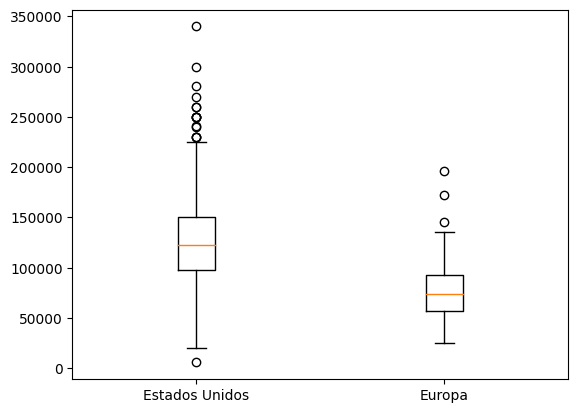

In [544]:
# gerando o boxplot
pyplot.boxplot([US_MI,EU_MI], labels=['Estados Unidos', 'Europa'])
pass

A partir do gráfico acima, é possível observar que a mediana dos salários de empresas dos Estados Unidos é maior que a mediana dos salários de empresas da Europa. E como o teste de hipótese resultou em distribuições diferentes, é possível afirmar que os salários pagos nos Estados Unidos é maior que os salários pagos na Europa para o nível Pleno.

A seguir, também será verificado se empresas dos Estados Unidos pagam um salário mais baixo para cientistas de dados estrangeiros, levando em consideração apenas o nível Pleno.

Primeiramente, as variâncias dos grupos serão verificadas.

In [545]:
# selecionando apenas empresas dos US, apenas o nível de experiência Pleno e apenas cientistas de dados dos US
US_MI_US = df[(df['company_location']=='US') & (df['experience_level']=='MI') & (df['employee_residence']=='US')]['salary_in_usd']

# selecionando apenas empresas dos US, apenas o nível de experiência Pleno e apenas cientistas de dados estrangeiros
US_MI_EST = df[(df['company_location']=='US') & (df['experience_level']=='MI') & (df['employee_residence']!='US')]['salary_in_usd']

# verificando a variância dos 2 grupos
print("Variância Estados Unidos:", US_MI_US.var())
print("Variância Estrangeiros:", US_MI_EST.var())

Variância Estados Unidos: 1992453141.4806123
Variância Estrangeiros: 2359311197.8


Acima, é possível verificar que as variâncias dos dois grupos são semelhantes. Agora, será verificado se os grupos seguem uma distribuição normal.

In [546]:
print("P-Value Americanos:", stats.shapiro(US_MI_US).pvalue)
print("P-Value Estrangeiros:", stats.shapiro(US_MI_EST).pvalue)

P-Value Americanos: 2.9583611116379416e-09
P-Value Estrangeiros: 0.03340975567698479


Acima, é possível observar que nenhum dos 2 grupos seguem uma distribuição normal, logo, o *Teste T Não-Pareado* não poderá ser utilizado. Sendo assim, será utilizado o *Teste Man-Whitney*.

In [547]:
stats.mannwhitneyu(US_MI_US, US_MI_EST)

MannwhitneyuResult(statistic=6567.0, pvalue=1.165838887513956e-06)

Como o p-valor do teste de hipótese foi muito baixo (menor que 0,05), a distribuição dos dois grupos, novamente, são diferentes. Sendo assim, existe uma diferença entre os salários pagos para cientistas de dados dos Estados Unidos e cientistas de dados estrangeiros, para o nível Pleno, em empresas dos Estados Unidos.

A seguir será gerado um boxplot para verificar melhor essa diferença entre os salários.

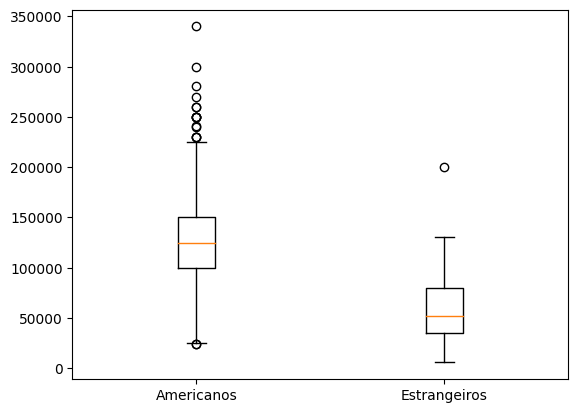

In [548]:
# gerando o boxplot
pyplot.boxplot([US_MI_US,US_MI_EST], labels=['Americanos', 'Estrangeiros'])
pass

A partir do gráfico acima, é possível observar que a mediana dos salários pagos para Americanos é maior que a mediana dos salários pagos para Estrangeiros. E, como o teste de hipótese resultou em distribuições diferentes, é possível afirmar que os salários pagos para Americanos é maior que os salários pagos Estrangeiros, quando se trata de empresas residentes nos Estados Unidos e, especificamente, para o nível Pleno

# **PROJETO 2** - Salários de Cientistas de Dados

## **1 - ESCOLHER COLUNA PARA PREDIÇÃO**

A coluna escolhida para predição será a coluna *salary_in_usd*: coluna que contém os salários pagos convertidos para dólar.

Para selecionar as features para predição será utilizada a correlação de *Spearman*.

In [549]:
dfCorr = dfNorm.corr('spearman')['salary_in_usd'].abs().sort_values(ascending=False)
print(dfCorr)

salary_in_usd         1.000000
salary                0.903390
salary_currency       0.440976
experience_level      0.418623
company_location      0.407925
employee_residence    0.401160
job_title             0.183291
work_year             0.162902
remote_ratio          0.035263
employment_type       0.019488
company_size          0.002554
Name: salary_in_usd, dtype: float64


Dentre as colunas acima, a própria coluna *salary_in_usd* será excluída. E a coluna *salary* também será excluída, pois esta coluna é a própria coluna *salary_in_usd* em uma outra unidade (podendo estar em euro, rupia indiana, dólar canadense, etc).

Observando as correlações das variáveis acima, observa-se que nenhuma variável possui uma forte correlação com a variável *salary_in_usd*. Por conta disso, serão selecionadas as colunas que possuírem uma correlação maior que 0,15.

In [550]:
# excluindo a própria coluna salary_in_usd
del dfCorr['salary_in_usd']
del dfCorr['salary']

# excluindo a própria coluna salary_in_usd
dfCorr = dfCorr[dfCorr>0.15]

features = dfCorr.index
print(features)

Index(['salary_currency', 'experience_level', 'company_location',
       'employee_residence', 'job_title', 'work_year'],
      dtype='object')


E além das variáveis possuírem uma correlação fraca com *salary_in_usd*, muitas delas possuem uma correlação forte entre si. Logo, é provável que o modelo que será treinado, tenha um baixo desempenho.

<Axes: >

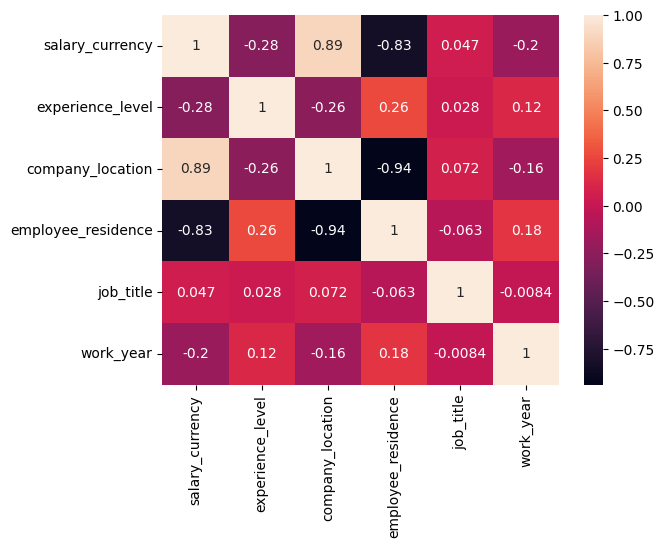

In [551]:
import seaborn
seaborn.heatmap(dfNorm[features].corr('spearman'), annot=True)

## **2 - SEPARAÇÃO DOS DADOS (TREINO, VALIDAÇÃO E TESTE)**

Abaixo será realizada a separação de um conjunto de dados para treino e validação e outro conjunto de dados para o teste. É importante ressaltar que será utilizado um único conjunto de dados para treino e validação, pois será realizado uma validação cruzada (com 5 folds). Sendo que 85% dos dados serão separados para treino e validação e os outros 15% para teste.

In [552]:
x = dfNorm[features].values
y = dfNorm['salary_in_usd'].values

# importando a biblioteca para separação dos dados e a biblioteca para cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

# separando os dados de treino
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.15, random_state=0)

print('Tamanho do Dataset:', y.size)
print('Tamanho do Conjunto de Treino:', yTrain.size)
print('Tamanho do Conjunto de Teste:', yTest.size)

Tamanho do Dataset: 3482
Tamanho do Conjunto de Treino: 2959
Tamanho do Conjunto de Teste: 523


## **3 - ESCOLHA DOS ALGORÍTMOS DE MACHINE LEARNING**

Os algorítmos de machine learning escolhidos são: Decision Tree, Random Forest, Regressão Linear e MLP (Multilayer Perceptron).

In [607]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# REGRESSÃO LINEAR
from sklearn.linear_model import LinearRegression

# MLP
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

## **4 - ADICIONANDO MLFLOW NO TREINAMENTO DOS MODELOS**

In [554]:
!pip install mlflow

In [555]:
import mlflow
import mlflow.sklearn
import mlflow.keras
mlflow.set_experiment(experiment_name='projeto2')

<Experiment: artifact_location='file:///content/mlruns/834281852977682904', creation_time=1689365135202, experiment_id='834281852977682904', last_update_time=1689365135202, lifecycle_stage='active', name='projeto2', tags={}>

## **5 - SELEÇÃO DE HIPERPARÂMETROS ATRAVÉS DE UM ALGORÍTMO DE OTIMIZAÇÃO**
A ferramenta escolhida para tunagem dos hiperparâmetros foi a biblioteca *scikit-optimize*. A partir desta biblioteca, será utilizada a função *gp_minimize*, que é um algoritmo de otimização Bayesiana.

In [556]:
# importando as métricas que serão analisadas
from sklearn.metrics import mean_absolute_error

# instalando e importando o algorítmo de otimização
!pip install scikit-optimize
from skopt import gp_minimize

### **5.1 - DECISION TREE**
O 1º algorítmo testado será a Decision Tree:

In [557]:
with mlflow.start_run(run_name='DecisionTree'):
  ## OTIMIZANDO OS HIPERPARÂMETROS
  # obs: como gp_minimize é um algoritmo que irá buscar o mínimo, será utilizado o sinal negativo no retorno da função
  def otimiza(par):
      modelo = DecisionTreeRegressor(max_depth=par[0], min_samples_leaf=par[1])
      return -cross_val_score(modelo, xTrain, yTrain, cv=5).mean()

  listPar = [(1, 5000), (1, 30)]
  minimo = gp_minimize(otimiza, listPar, random_state=0, n_calls=10)
  depth = minimo.x[0]
  leaf = minimo.x[1]
  scoreCrossVal=-minimo.fun


  ## TREINANDO O MODELO
  modeloDT = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf)
  modeloDT.fit(xTrain, yTrain)
  yPred = modeloDT.predict(xTrain)
  maeTrain = mean_absolute_error(yTrain, yPred)


  ## TESTANDO O MODELO
  yPred = modeloDT.predict(xTest)
  maeTest = mean_absolute_error(yTest, yPred)

  ## INSERINDO OS HIPERPARÂMETROS, MÉTRICAS E O MODELO NO MLFLOW
  mlflow.log_param('max_depth', depth)
  mlflow.log_param('min_samples_leaf', leaf)
  mlflow.log_metric('maeTrainDT', maeTrain)
  mlflow.log_metric('maeTestDT', maeTest)
  mlflow.sklearn.log_model(modeloDT,'modeloDT')



print("MAE Treino:", maeTrain)
print("MAE Teste:", maeTest)
print("Profundidade Máxima:", depth)
print("Mínimo de Amostras por Folha:", leaf)

MAE Treino: 0.08655878557007195
MAE Teste: 0.08627109952738812
Profundidade Máxima: 4290
Mínimo de Amostras por Folha: 26


Acima, é possível observar o MAE com o conjunto de Treino, o MAE com o conjunto de teste, o valor ótimo da profundidade máxima da árvore e o valor ótimo do mínimo de amostras por folha.

### **5.2 - RANDOM FOREST**
O 2º algorítmo testado será a Decision Tree:

In [558]:
with mlflow.start_run(run_name='RandomForest'):
  ## OTIMIZANDO OS HIPERPARÂMETROS
  # obs: como gp_minimize é um algoritmo que irá buscar o mínimo, será utilizado o sinal negativo no retorno da função
  def otimiza(par):
      modelo = RandomForestRegressor(max_depth=par[0], min_samples_leaf=par[1], n_estimators=par[2])
      return -cross_val_score(modelo, xTrain, yTrain, cv=5).mean()

  listPar = [(1, 5000), (1, 30), (10,100)]
  minimo = gp_minimize(otimiza, listPar, random_state=0, n_calls=10)
  depth = minimo.x[0]
  leaf = minimo.x[1]
  estimators=minimo.x[2]
  scoreCrossVal=-minimo.fun


  ## TREINANDO O MODELO
  modeloRF = RandomForestRegressor(max_depth=depth, min_samples_leaf=leaf, n_estimators=estimators)
  modeloRF.fit(xTrain, yTrain)
  yPred = modeloRF.predict(xTrain)
  maeTrain = mean_absolute_error(yTrain, yPred)


  ## TESTANDO O MODELO
  yPred = modeloRF.predict(xTest)
  maeTest = mean_absolute_error(yTest, yPred)


  ## INSERINDO OS HIPERPARÂMETROS, AS MÉTRICAS E O MODELO NO MLFLOW
  mlflow.log_param('max_depth', depth)
  mlflow.log_param('min_samples_leaf', leaf)
  mlflow.log_param('n_estimators', estimators)
  mlflow.log_metric('maeTrainRF', maeTrain)
  mlflow.log_metric('maeTestRF', maeTest)
  mlflow.sklearn.log_model(modeloRF,'modeloRF')


print("MAE Treino:", maeTrain)
print("MAE Teste:", maeTest)
print("Profundidade Máxima:", depth)
print("Mínimo de Amostras por Folha:", leaf)
print("Número de Árvores:", estimators)

MAE Treino: 0.08541372777382578
MAE Teste: 0.08539838711352499
Profundidade Máxima: 3241
Mínimo de Amostras por Folha: 12
Número de Árvores: 96


Acima, é possível observar o MAE com o conjunto de Treino, o MAE com o conjunto de teste, o valor ótimo da profundidade máxima da árvore, o valor ótimo do mínimo de amostras por folha e o valor ótimo do número de árvores.

### **5.3 - REGRESSÃO LINEAR**
O 3º algorítmo testado será a Regressão Linear:

In [559]:
with mlflow.start_run(run_name='LinearRegression'):
  ## TREINANDO O MODELO
  modeloLR = LinearRegression()
  modeloLR.fit(xTrain, yTrain)
  yPred = modeloLR.predict(xTrain)
  maeTrain = mean_absolute_error(yTrain, yPred)


  ## TESTANDO O MODELO
  yPred = modeloLR.predict(xTest)
  maeTest = mean_absolute_error(yTest, yPred)

  ## INSERINDO AS MÉTRICAS E O MODELO NO MLFLOW
  mlflow.log_metric('maeTrainLR', maeTrain)
  mlflow.log_metric('maeTestLR', maeTest)
  mlflow.sklearn.log_model(modeloLR,'modeloLR')


print("MAE Treino:", maeTrain)
print("MAE Teste:", maeTest)

MAE Treino: 0.09270599086375915
MAE Teste: 0.09216274780185353


Acima, é possível observar o MAE com o conjunto de Treino e o MAE com o conjunto de teste.

### **5.4 - Multilayer Perceptron**
O 4º algorítmo testado será o Multilayer Perceptron:

In [560]:
with mlflow.start_run(run_name='MLP'):
  # CRIANDO o MLP
  objSeq = Sequential()
  objSeq.add(Dense(units=20, input_dim=features.size, activation="relu"))
  objSeq.add(Dense(units=20, activation="relu"))
  objSeq.add(Dense(units=1))
  objSeq.compile(optimizer = 'adam', loss = "mean_squared_error", metrics = "mae")


  # TREINADO O MLP
  modeloMLP = objSeq.fit(xTrain, yTrain, batch_size=20, validation_split=0.1, epochs=50)
  yPred = modeloMLP.model.predict(xTrain)
  maeTrain = mean_absolute_error(yTrain, yPred)


  ## TESTANDO O MLP
  yPred = modeloMLP.model.predict(xTest)
  maeTest = mean_absolute_error(yTest, yPred)


  ## INSERINDO AS MÉTRICAS E O MODELO NO MLFLOW
  mlflow.log_metric('maeTrainMLP', maeTrain)
  mlflow.log_metric('maeTestMLP', maeTest)
  mlflow.keras.log_model(modeloMLP.model,'modelo')

print("\n\nMAE Treino:", maeTrain)
print("MAE Teste:", maeTest)

Epoch 1/50
134/134 [==============================] - 1s 5ms/step - loss: 0.0506 - mae: 0.1558 - val_loss: 0.0147 - val_mae: 0.0910
Epoch 2/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0147 - mae: 0.0941 - val_loss: 0.0150 - val_mae: 0.0962
Epoch 3/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0939 - val_loss: 0.0144 - val_mae: 0.0910
Epoch 4/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0144 - mae: 0.0930 - val_loss: 0.0145 - val_mae: 0.0928
Epoch 5/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0143 - mae: 0.0928 - val_loss: 0.0143 - val_mae: 0.0914
Epoch 6/50
134/134 [==============================] - 0s 3ms/step - loss: 0.0143 - mae: 0.0928 - val_loss: 0.0143 - val_mae: 0.0920
Epoch 7/50
134/134 [==============================] - 0s 2ms/step - loss: 0.0142 - mae: 0.0929 - val_loss: 0.0141 - val_mae: 0.0901
Epoch 8/50
134/134 [==============================] - 0s 3ms/step - loss: 0.

2023/07/15 00:11:22 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/07/15 00:11:29 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.13+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.13' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.




MAE Treino: 0.08894968335549581
MAE Teste: 0.08858459187254386


Acima, é possível observar o MAE com o conjunto de Treino e o MAE com o conjunto de teste.

## **6 - DIAGNÓSTICO DO MELHOR MODELO**

Text(0, 0.5, 'Valores Reais')

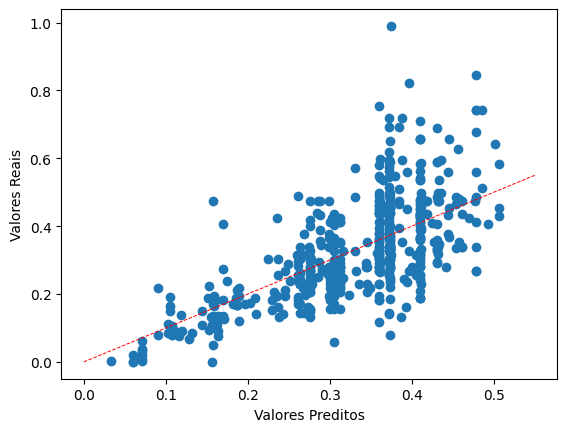

In [598]:
yPred = modeloRF.predict(xTest)
pyplot.plot((0,0.55),(0,0.55), color='red', linestyle='--', linewidth=0.7)
pyplot.scatter(yPred, yTest)
pyplot.xlabel("Valores Preditos")
pyplot.ylabel("Valores Reais")

No gráfico acima, podemos observar que para valores menores de salário, o modelo tem uma maior eficácia, pois os pontos estão mais próximos da linha vermelha tracejada. Já para valores maiores de salário, o modelo tem uma baixa eficácia, uma vez que os pontos estão mais distantes da linha tracejada.

<Axes: >

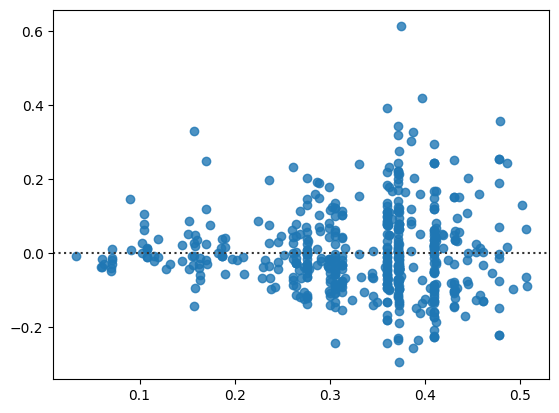

In [599]:
seaborn.residplot(x=yPred, y=yTest)

Visualizando o gráfico de resíduos acima, é possível observar que a distribuição dos pontos em torno da linha tracejada não é uniforme. O que pode ser o indício de muitos outliers nos dados.